<a href="https://nbviewer.jupyter.org/github/alisonmitchell/Biomedical-Knowledge-Graph/blob/main/02_Exploratory_Data_Analysis/Feature_Extraction_Frequency_Vectors.ipynb"
   target="_parent">
   <img src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg"
      width="109" height="20" alt="render in nbviewer">
</a>

# Feature Extraction - Frequency Vectors


## 1. Introduction

Feature engineering is the transformation of raw unstructured data into a more effective set of normalised, machine-readable input features for machine learning models.

Feature extraction is a subset of feature engineering comprising various methods for selecting and/or combining variables into features to reduce the dimensionality of the data.

Here we will perform feature extraction by vectorisation, or converting the text data into numeric representations, using frequency-based methods.

## 2. Install/import libraries

In [ ]:
!pip install spacy scispacy

In [ ]:
!python -m spacy download en_core_web_md

In [ ]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.3/en_core_sci_sm-0.5.3.tar.gz

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
import spacy
import scispacy
import warnings
warnings.filterwarnings("ignore")

from spacy.lang.en import stop_words
from spacy.tokenizer import Tokenizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

## 3. Import data




In [ ]:
with open('2024-03-08_pmc_arxiv_full_text_merged_plus_cleaned_article_titles_preproc.pickle', 'rb') as f:
  pmc_arxiv_full_text_merged_plus_cleaned_article_titles_preproc = pickle.load(f)

In [ ]:
pmc_arxiv_full_text_merged_plus_cleaned_article_titles_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11687 entries, 0 to 11686
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   article_id          11687 non-null  object
 1   published           11687 non-null  object
 2   revised             11687 non-null  object
 3   title               11687 non-null  object
 4   title_cleaned       11687 non-null  object
 5   journal             11426 non-null  object
 6   authors             11687 non-null  object
 7   doi                 11450 non-null  object
 8   pdf_url             11687 non-null  object
 9   text                11687 non-null  object
 10  word_count          11687 non-null  int64 
 11  sent_count          11687 non-null  int64 
 12  title_preproc       11687 non-null  object
 13  title_preproc_lemm  11687 non-null  object
dtypes: int64(2), object(12)
memory usage: 1.2+ MB


In [ ]:
with open('2024-03-02_pmc_arxiv_full_text_merged_plus_cleaned_article_titles_test_tokenized.pickle', 'rb') as f:
  pmc_arxiv_full_text_merged_plus_cleaned_article_titles_test = pickle.load(f)

In [ ]:
pmc_arxiv_full_text_merged_plus_cleaned_article_titles_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   article_id     20 non-null     object
 1   published      20 non-null     object
 2   revised        20 non-null     object
 3   title          20 non-null     object
 4   title_cleaned  20 non-null     object
 5   journal        20 non-null     object
 6   authors        20 non-null     object
 7   doi            20 non-null     object
 8   pdf_url        20 non-null     object
 9   text           20 non-null     object
 10  text_cleaned   20 non-null     object
 11  word_tok       20 non-null     object
 12  sent_tok       20 non-null     object
 13  word_count     20 non-null     int64 
 14  sent_count     20 non-null     int64 
dtypes: int64(2), object(13)
memory usage: 2.5+ KB


## 4. Frequency vectors

Frequency-based, or statistical-based, word representation methods are where raw text is transformed into a vector form which contains the number of the words appearing in a document.






### 4.1  Bag of Words

The Bag of Words (BOW) model is the simplest
text vectorisation approach and generates a frequency count of each word in a given text disregarding order. There are various ways to represent and identify the importance of words in the BOW model, including techniques like CountVectorizer, TF-IDF, and the use of n-grams.

## 5. Categorical word representation

### 5.1 CountVectorizer

We will use the `CountVectorizer()` class in scikit-learn to transform a collection of text documents into a matrix of word or token counts with the frequency of each word as it appears in the document.

In [ ]:
# Create a corpus of two test documents
text = ["This variant of coronavirus evolved to become the most contagious and infectious among coronavirus family",
        "It enters the lungs by inhaling the contaminated air with viral bodies and infects distal airway cells leading to further spread towards alveolar epithelial cells and causes the damage starting from infection to severe damage"]

# Create a DataFrame
df = pd.DataFrame({'text': text})
df

,text
0,This variant of coronavirus evolved to become ...
1,It enters the lungs by inhaling the contaminat...


In [ ]:
# Initialise a CountVectorizer object to implement the BOW model
cv = CountVectorizer()

# Create dictionary of words from the corpus
features = cv.fit(df.text)

# Return feature names extracted by the CountVectorizer
feature_names = features.get_feature_names_out()
feature_names

array(['air', 'airway', 'alveolar', 'among', 'and', 'become', 'bodies',
       'by', 'causes', 'cells', 'contagious', 'contaminated',
       'coronavirus', 'damage', 'distal', 'enters', 'epithelial',
       'evolved', 'family', 'from', 'further', 'infection', 'infectious',
       'infects', 'inhaling', 'it', 'leading', 'lungs', 'most', 'of',
       'severe', 'spread', 'starting', 'the', 'this', 'to', 'towards',
       'variant', 'viral', 'with'], dtype=object)

In [ ]:
print('Total Number of features extracted is', len(feature_names))

Total Number of features extracted is 40


In [ ]:
# Convert features into their vector form

feature_vector = cv.transform(df.text)
feature_vector.shape

(2, 40)

The two documents are represented by 40 features.



In [ ]:
# create a DataFrame from the BOW representation
df_bow = pd.DataFrame(features, columns=feature_names)
df_bow

,air,airway,alveolar,among,and,become,bodies,by,causes,cells,...,severe,spread,starting,the,this,to,towards,variant,viral,with
0,0,0,0,1,1,1,0,0,0,0,...,0,0,0,1,1,1,0,1,0,0
1,1,1,1,0,2,0,1,1,1,2,...,1,1,1,3,0,2,1,0,1,1


We will find the number of non-zero values in the feature vector.

In [ ]:
# get the number of non-zero values.
feature_vector.getnnz()

43

Density is the number of non-zero items divided by number of all items in the matrix.

In [ ]:
# get the non-zero value density in the documents
feature_vector.getnnz()/(feature_vector.shape[0]*feature_vector.shape[1])

0.5375

In [ ]:
# a lot of zero values
feature_vector.todense()

matrix([[0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0,
         0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 0, 2, 0, 1, 1, 1, 2, 0, 1, 0, 2, 1, 1, 1, 0, 0, 1, 1,
         1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 3, 0, 2, 1, 0, 1, 1]])



The matrix contains the 40 features, or unique words, with the number of times they appear in the documents. If a feature is not present, it has a value of 0. We also have stopwords in this sample text such as 'and' and 'the' which occur in both documents sometimes multiple times.

In [ ]:
# load spaCy model and disable unused components
nlp = spacy.load("en_core_sci_sm", disable=["tok2vec", "tagger", "parser", "attribute_ruler", "lemmatizer", "ner"])

We will remove spaCy's default stopwords.

In [ ]:
def remove_stop_words():
    stop = [word.lower() for word in nlp.Defaults.stop_words]
    return stop

We will repeat the process this time passing the stopwords as a parameter so that they do not appear in the count vector.

In [ ]:
cv2 = CountVectorizer(stop_words=remove_stop_words())
feature_names2 = cv2.fit(df.text)

feature_vector2 = cv2.transform(df.text)
feature_vector2.shape

(2, 26)

The number of features has decreased from 40 to 26.

In [ ]:
feature_names = feature_names2.get_feature_names_out()
feature_counts = np.sum(feature_vector2.toarray(), axis = 0)

pd.DataFrame(dict(Features = feature_names, Count = feature_counts))

,Features,Count
0,air,1
1,airway,1
2,alveolar,1
3,bodies,1
4,causes,1
5,cells,2
6,contagious,1
7,contaminated,1
8,coronavirus,2
9,damage,2


We can see that all the stopwords have been removed.

#### 5.1.2 Compare n-grams

We will extract and compare n-grams for article titles and text before and after preprocessing to remove stopwords, again using the `CountVectorizer()` class.



In [ ]:
def get_top_ngrams(corpus, ngram_range, n=None):
    cv = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = cv.transform(corpus)

    sum_words = bag_of_words.sum(axis=0)

    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

    common_words = words_freq[:n]
    words = []
    freqs = []
    for word, freq in common_words:
        words.append(word)
        freqs.append(freq)

    df = pd.DataFrame({'Word': words, 'Freq': freqs})
    return df

We will call the function on the title column containing stopwords for the top 20 unigrams, bigrams and trigrams.

In [ ]:
# with stopwords
n = 20
unigrams = get_top_ngrams(pmc_arxiv_full_text_merged_plus_cleaned_article_titles_preproc.title_cleaned.str.lower(), (1, 1), n)
bigrams = get_top_ngrams(pmc_arxiv_full_text_merged_plus_cleaned_article_titles_preproc.title_cleaned.str.lower(), (2, 2), n)
trigrams = get_top_ngrams(pmc_arxiv_full_text_merged_plus_cleaned_article_titles_preproc.title_cleaned.str.lower(), (3, 3), n)

And repeat the process for titles with stopwords removed.

In [ ]:
# without stopwords
n = 20
unigrams_st = get_top_ngrams(pmc_arxiv_full_text_merged_plus_cleaned_article_titles_preproc.title_preproc.str.lower(), (1, 1), n)
bigrams_st = get_top_ngrams(pmc_arxiv_full_text_merged_plus_cleaned_article_titles_preproc.title_preproc.str.lower(), (2, 2), n)
trigrams_st = get_top_ngrams(pmc_arxiv_full_text_merged_plus_cleaned_article_titles_preproc.title_preproc.str.lower(), (3, 3), n)

#### 5.1.3 Barplots to compare top 20 n-grams

In [ ]:
def plot_ngrams(title_txt, data, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    sns.barplot(x='Freq', y='Word', data=data, palette='viridis', ax=ax)
    ax.set_title(title_txt, size=12)

#### 5.1.4 Plot n-grams from titles

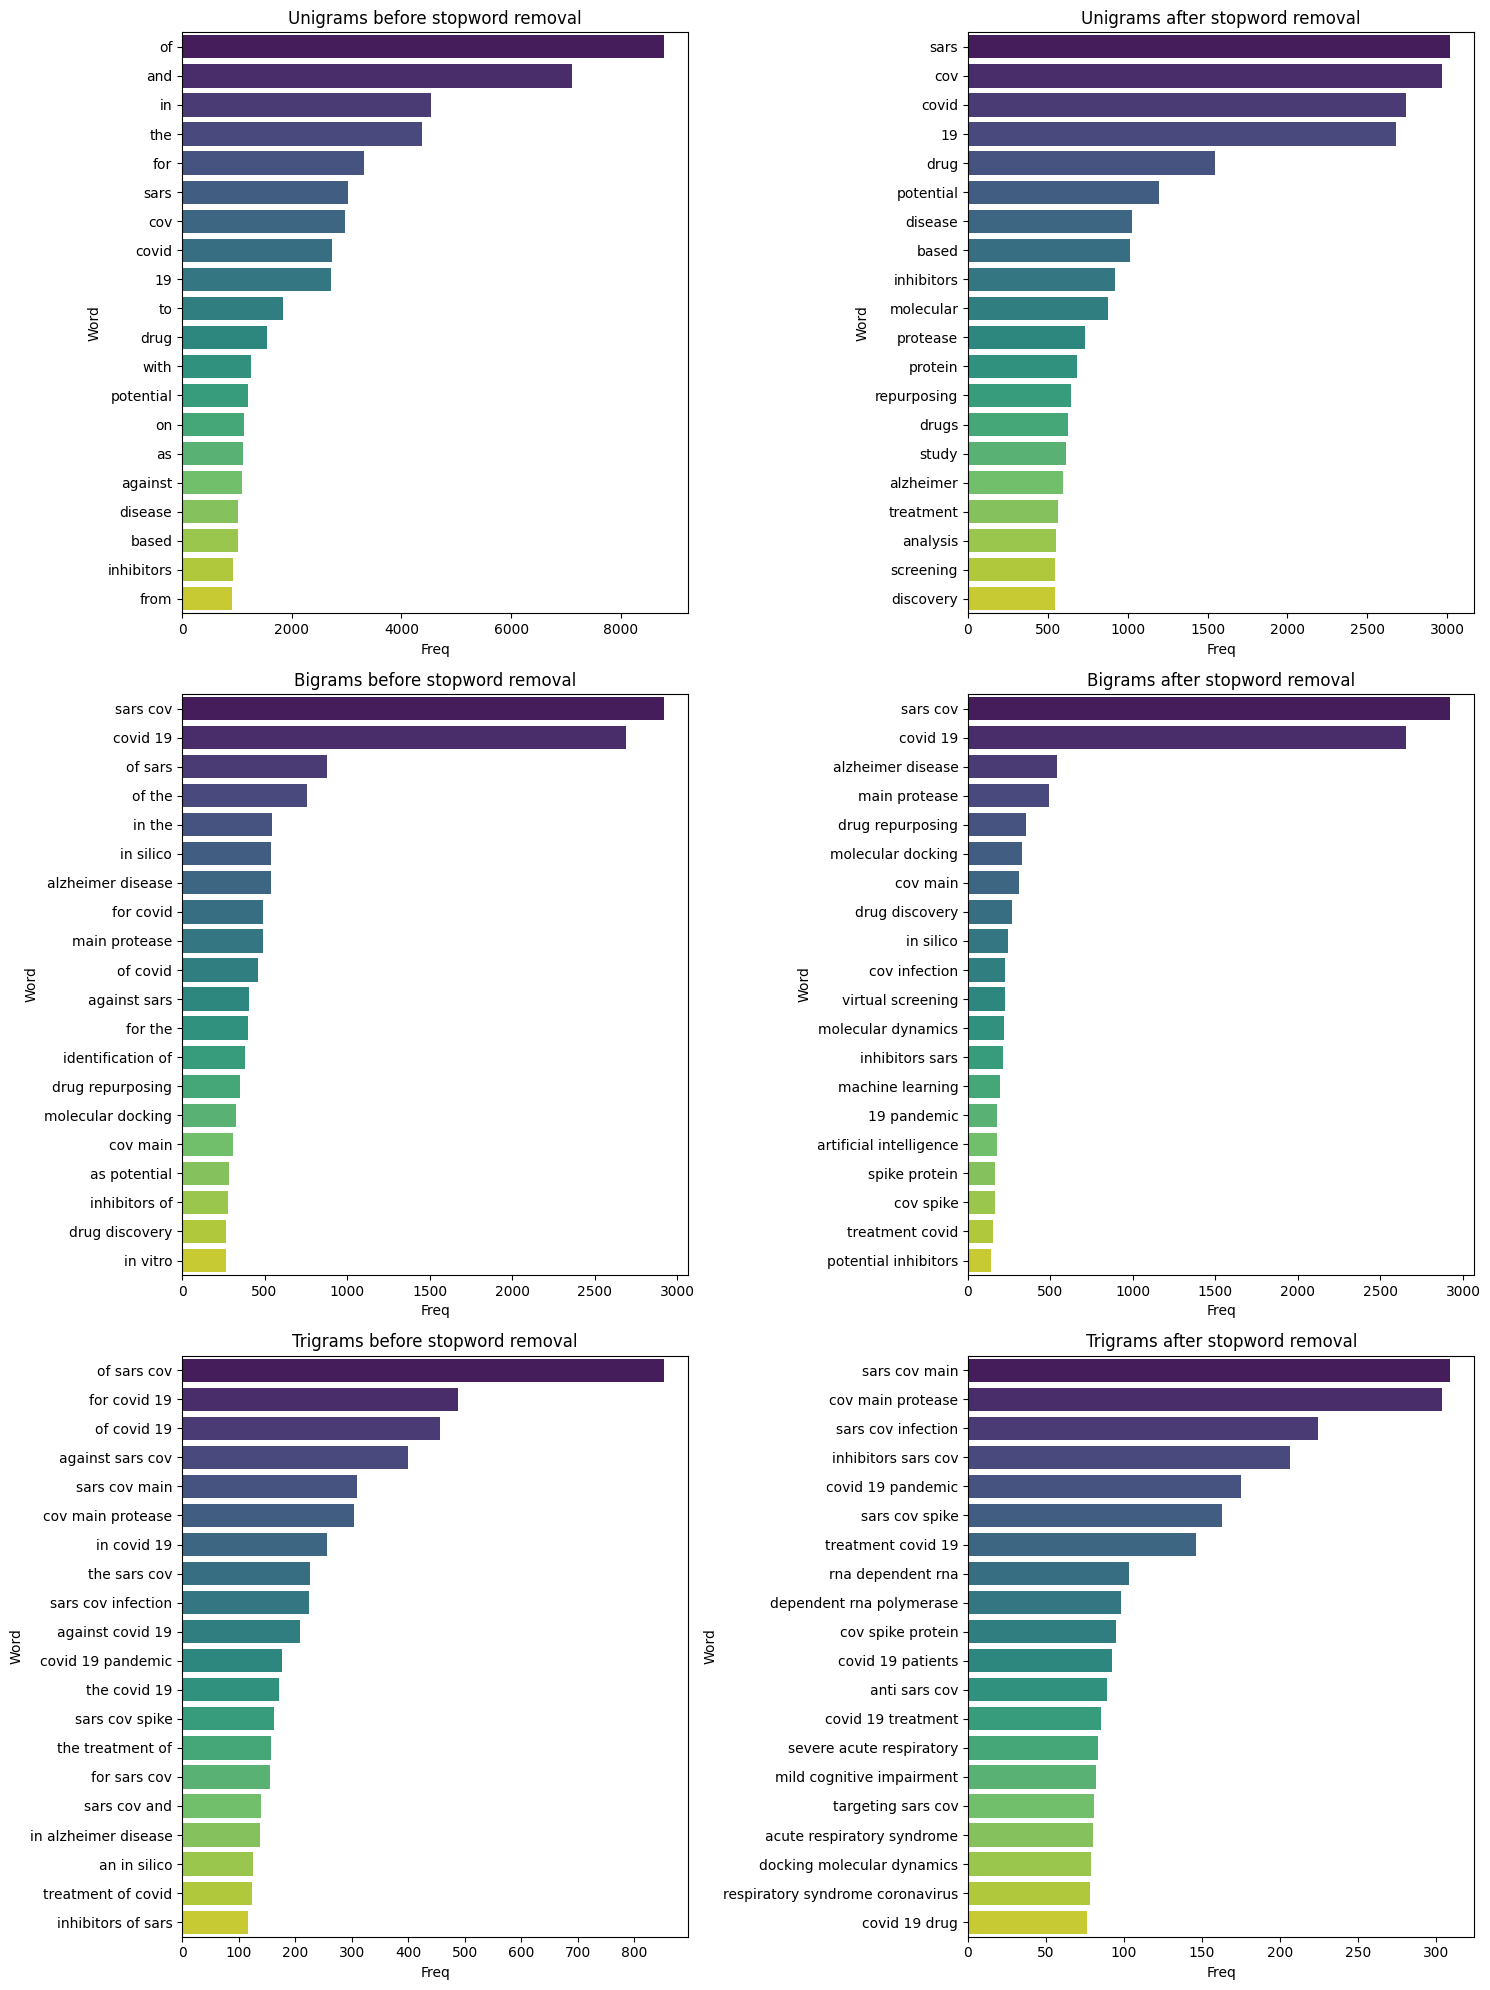

In [ ]:
def plot_multiple_ngrams(n):
    # Create subplots with 3 rows and 2 columns
    fig, axs = plt.subplots(3, 2, figsize=(15, 20))

    # Unigrams
    plot_ngrams('Unigrams before stopword removal', unigrams, ax=axs[0, 0])

    # Unigrams_st
    plot_ngrams('Unigrams after stopword removal', unigrams_st, ax=axs[0, 1])

    # Bigrams
    plot_ngrams('Bigrams before stopword removal', bigrams, ax=axs[1, 0])

    # Bigrams_st
    plot_ngrams('Bigrams after stopword removal', bigrams_st, ax=axs[1, 1])

    # Trigrams
    plot_ngrams('Trigrams before stopword removal', trigrams, ax=axs[2, 0])

    # Trigrams_st
    plot_ngrams('Trigrams after stopword removal', trigrams_st, ax=axs[2, 1])

    # Adjust layout to prevent overlap
    plt.tight_layout()


    plt.savefig('ngram_freq_subplots_titles.png')
    plt.show()

plot_multiple_ngrams(n=20)

#### 5.1.5 Plot n-grams from first 20 articles text

We will call the function on the text column containing stopwords for the top 20 unigrams, bigrams and trigrams.

In [ ]:
# with stopwords
n = 20
unigrams = get_top_ngrams(pmc_arxiv_full_text_merged_plus_cleaned_article_titles_test.text.str.lower(), (1, 1), n)
bigrams = get_top_ngrams(pmc_arxiv_full_text_merged_plus_cleaned_article_titles_test.text.str.lower(), (2, 2), n)
trigrams = get_top_ngrams(pmc_arxiv_full_text_merged_plus_cleaned_article_titles_test.text.str.lower(), (3, 3), n)

And repeat the process for text with stopwords removed.

In [ ]:
# without stopwords
n = 20
unigrams_st = get_top_ngrams(pmc_arxiv_full_text_merged_plus_cleaned_article_titles_test.text_cleaned.str.lower(), (1, 1), n)
bigrams_st = get_top_ngrams(pmc_arxiv_full_text_merged_plus_cleaned_article_titles_test.text_cleaned.str.lower(), (2, 2), n)
trigrams_st = get_top_ngrams(pmc_arxiv_full_text_merged_plus_cleaned_article_titles_test.text_cleaned.str.lower(), (3, 3), n)

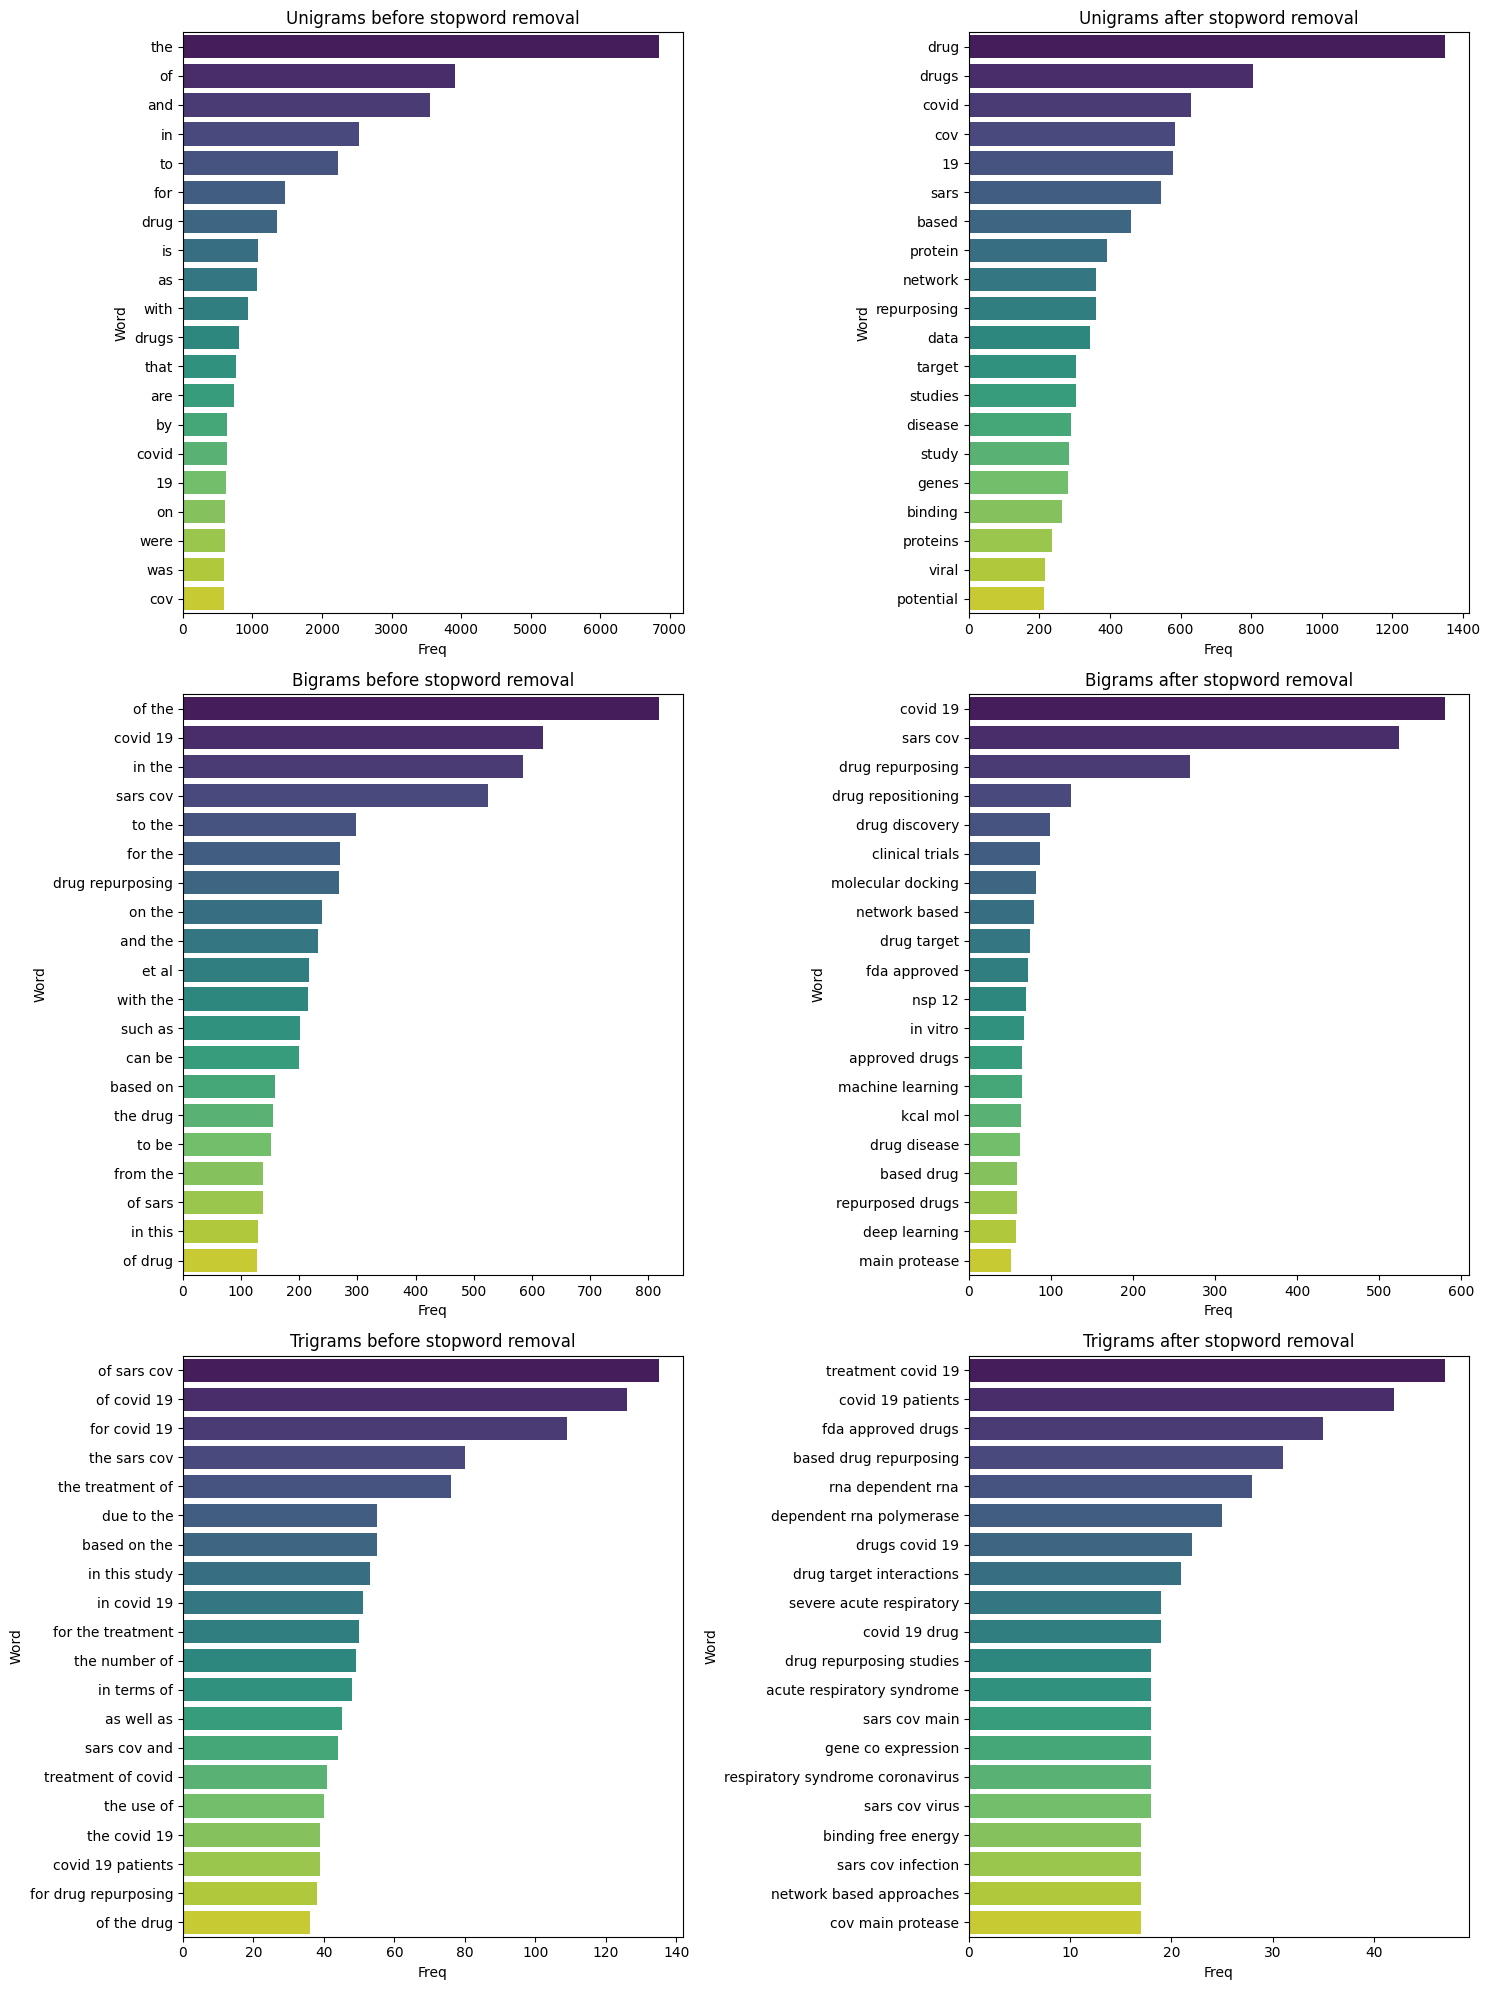

In [ ]:
def plot_multiple_ngrams(n):
    # Create subplots with 3 rows and 2 columns
    fig, axs = plt.subplots(3, 2, figsize=(15, 20))

    # Unigrams
    plot_ngrams('Unigrams before stopword removal', unigrams, ax=axs[0, 0])

    # Unigrams_st
    plot_ngrams('Unigrams after stopword removal', unigrams_st, ax=axs[0, 1])

    # Bigrams
    plot_ngrams('Bigrams before stopword removal', bigrams, ax=axs[1, 0])

    # Bigrams_st
    plot_ngrams('Bigrams after stopword removal', bigrams_st, ax=axs[1, 1])

    # Trigrams
    plot_ngrams('Trigrams before stopword removal', trigrams, ax=axs[2, 0])

    # Trigrams_st
    plot_ngrams('Trigrams after stopword removal', trigrams_st, ax=axs[2, 1])

    # Adjust layout to prevent overlap
    plt.tight_layout()


    plt.savefig('ngram_freq_subplots_text.png')
    plt.show()

plot_multiple_ngrams(n=20)

## 6. Weighted word representation

### 6.1  TF-IDF

`CountVectorizer()` counts the frequency of words in a document but does not take into account the context of the corpus. We will try another approach by using `TfidfVectorizer()`, or Term Frequency-Inverse Document Frequency, which considers the relative frequency of tokens in a document against their frequency across all documents in the corpus, down-weighting frequent words and giving rare terms a higher IDF score. Basically this can be calculated as TF-IDF = TF x IDF. The intuition is that meaning is encoded in rarer terms, with a score of 1 being rare and 0 being frequent.


In [ ]:
# create a corpus of two test documents the same as for CountVectorizer()
text = ["This variant of coronavirus evolved to become the most contagious and infectious among coronavirus family",
        "It enters the lungs by inhaling the contaminated air with viral bodies and infects distal airway cells leading to further spread towards alveolar epithelial cells and causes the damage starting from infection to severe damage"]

# create a TfidfVectorizer object to implement the TF-IDF model
tfidf = TfidfVectorizer()

# fit the data to TfidfVectorizer and convert to feature matrix
X = tfidf.fit_transform(text).toarray()

# return the vocabulary of unique words
features = tfidf.get_feature_names_out()

In [ ]:
features

array(['air', 'airway', 'alveolar', 'among', 'and', 'become', 'bodies',
       'by', 'causes', 'cells', 'contagious', 'contaminated',
       'coronavirus', 'damage', 'distal', 'enters', 'epithelial',
       'evolved', 'family', 'from', 'further', 'infection', 'infectious',
       'infects', 'inhaling', 'it', 'leading', 'lungs', 'most', 'of',
       'severe', 'spread', 'starting', 'the', 'this', 'to', 'towards',
       'variant', 'viral', 'with'], dtype=object)

In [ ]:
print('Total Number of features extracted is ', len(features))

Total Number of features extracted is  40


In [ ]:
X.shape

(2, 40)

As expected, the two documents are represented by 40 features.

In [ ]:
# create a DataFrame from the tfidf representation
df_tfidf = pd.DataFrame(X, columns=features)
df_tfidf

,air,airway,alveolar,among,and,become,bodies,by,causes,cells,...,severe,spread,starting,the,this,to,towards,variant,viral,with
0,0.000000,0.000000,0.000000,0.253847,0.180614,0.253847,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.180614,0.253847,0.180614,0.000000,0.253847,0.000000,0.000000
1,0.156929,0.156929,0.156929,0.000000,0.223313,0.000000,0.156929,0.156929,0.156929,0.313859,...,0.156929,0.156929,0.156929,0.334970,0.000000,0.223313,0.156929,0.000000,0.156929,0.156929


We can see that instead of word counts for the non-zero values we now have scores of between 0 and 1.

In [ ]:
# transform() to convert to feature matrix
feature_vector = tfidf.transform(text)
feature_vector.shape

(2, 40)

In [ ]:
# get the number of non-zero values.
feature_vector.getnnz()

43

In [ ]:
# get the non-zero value density in the documents
# density is the number of non-zero items divided by number of all items in the matrix
feature_vector.getnnz()/(feature_vector.shape[0]*feature_vector.shape[1])

0.5375

In [ ]:
feature_vector.todense()

matrix([[0.        , 0.        , 0.        , 0.25384691, 0.18061417,
         0.25384691, 0.        , 0.        , 0.        , 0.        ,
         0.25384691, 0.        , 0.50769382, 0.        , 0.        ,
         0.        , 0.        , 0.25384691, 0.25384691, 0.        ,
         0.        , 0.        , 0.25384691, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.25384691, 0.25384691,
         0.        , 0.        , 0.        , 0.18061417, 0.25384691,
         0.18061417, 0.        , 0.25384691, 0.        , 0.        ],
        [0.15692932, 0.15692932, 0.15692932, 0.        , 0.22331301,
         0.        , 0.15692932, 0.15692932, 0.15692932, 0.31385865,
         0.        , 0.15692932, 0.        , 0.31385865, 0.15692932,
         0.15692932, 0.15692932, 0.        , 0.        , 0.15692932,
         0.15692932, 0.15692932, 0.        , 0.15692932, 0.15692932,
         0.15692932, 0.15692932, 0.15692932, 0.        , 0.        ,
         0.15692932, 0.15692932, 

In [ ]:
# load spaCy model and disable unused components
nlp = spacy.load("en_core_sci_sm", disable=["tok2vec", "tagger", "parser", "attribute_ruler", "lemmatizer", "ner"])

We will remove spaCy's default stopwords.

In [ ]:
def remove_stop_words():
    stop = [word.lower() for word in nlp.Defaults.stop_words]
    return stop

We will repeat the process this time passing the stopwords as a parameter so that they do not appear in the TF-IDF vector.

In [ ]:
tfidf2 = TfidfVectorizer(stop_words=remove_stop_words())
feature_names2 = tfidf2.fit(df_tfidf.text)

feature_vector2 = tfidf2.transform(df_tfidf.text)
feature_vector2.shape

(2, 26)

The number of features has decreased from 40 to 26.

In [ ]:
# Retrieve the feature names
feature_names = feature_names2.get_feature_names_out()

# Sum the TF-IDF scores across all documents for each word
feature_scores = np.sum(feature_vector2.toarray(), axis = 0)

# Combine the feature names and their scores into a DataFrame
pd.DataFrame(dict(Features = feature_names, Score = feature_scores))

,Features,Score
0,air,0.196116
1,airway,0.196116
2,alveolar,0.196116
3,bodies,0.196116
4,causes,0.196116
5,cells,0.392232
6,contagious,0.333333
7,contaminated,0.196116
8,coronavirus,0.666667
9,damage,0.392232


After removing the stopwords we can see that the highest score is for 'coronavirus' (0.666667), followed by 'cells' and 'damage' (0.392232), and 'contagious', 'evolved', 'family', 'infectious' and 'variant' (0.333333) with all others scoring 0.196116.

This is far more informative than just a word frequency count.

#### 6.1.1 N-grams from first 20 articles text

We will extract document features and scores for unigram, bigram and trigram features for the text from the first 20 articles using `TfidfVectorizer()`.

In [ ]:
with open('2024-03-02_pmc_arxiv_full_text_merged_plus_cleaned_article_titles_test.pickle', 'rb') as f:
    pmc_arxiv_full_text_merged_plus_cleaned_article_titles_test = pickle.load(f)

In [ ]:
def get_tfidf(corpus, ngram_range, max_features=None):
    # create a TfidfVectorizer object to implement the TF-IDF model and fit the data to it
    tfidf = TfidfVectorizer(ngram_range=ngram_range,
                            use_idf=True,
                            smooth_idf=True,
                            max_df=0.85,
                            min_df=0.05,
                            max_features=max_features).fit(corpus)
    # convert data into feature matrix
    X = tfidf.transform(corpus)
    # convert matrix into numpy array
    X_array = tfidf.transform(corpus).toarray()
    # get_feature_names_out() returns the vocabulary of unique words
    features = tfidf.get_feature_names_out()
    return X, X_array, features

#### 6.1.2 Unigrams

In [ ]:
X, X_array, features = get_tfidf(pmc_arxiv_full_text_merged_plus_cleaned_article_titles_test.text_cleaned, (1, 1))

In [ ]:
print('Total Number of features extracted is', len(features))

Total Number of features extracted is 8212


In [ ]:
features

array(['00 97', '00 adding', '00 center', ..., 'μm tcep', 'μm unwinding',
       'μm μm'], dtype=object)

In [ ]:
X.shape

(20, 8212)

In [ ]:
# get the number of non-zero values.
X.getnnz()

21609

In [ ]:
# get the non-zero value density in the documents
# density is the number of non-zero items divided by number of all items in the matrix
X.getnnz()/(X.shape[0]*X.shape[1])

0.13156965416463712

In [ ]:
# a sparse matrix with few non-zero values
X.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.03573958],
        [0.        , 0.01279292, 0.01612875, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.00864484, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.01172022, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [ ]:
# create a DataFrame from the tfidf representation
df_tfidf = pd.DataFrame(X_array, columns=features)
df_tfidf

,00,001,002,004,006,00610355,01,011,013,01325,...,ziprasidone,zj,zoonotic,β2,δ140,δg,κb,μg,μl,μm
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035740
2,0.000000,0.012793,0.016129,0.000000,0.014177,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.013061,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.006520,0.000000,0.000000,0.000000,0.000000,0.000000,0.007887,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.022488,0.000000,0.000000,0.000000,0.000000,0.000000,0.022488,0.000000,0.000000,0.000000
6,0.013174,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.008295,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011152
8,0.006711,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.008119,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### 6.1.3 Bigrams

In [ ]:
X, X_array, features = get_tfidf(pmc_arxiv_full_text_merged_plus_cleaned_article_titles_test.text_cleaned, (2, 2))

In [ ]:
print('Total Number of features extracted is', len(features))

Total Number of features extracted is 45765


In [ ]:
features

array(['00 97', '00 adding', '00 center', ..., 'μm tcep', 'μm unwinding',
       'μm μm'], dtype=object)

In [ ]:
features[:1000]

array(['00 97', '00 adding', '00 center', '00 statistically', '001 decay',
       '001 licoflavone', '001 subjects', '002 increased', '004 deepcda',
       '006 deepcda', '006 nct04405570', '00610355 blocked',
       '00610355 formed', '00610355 found', '00610355 kindly',
       '00610355 orally', '00610355 phe24', '00610355 reported',
       '01 candidates', '01 q2', '011 004', '013 006', '01325 bar',
       '02 kcal', '02 μm', '03 calculated', '03 the', '03 tree',
       '034 french', '034 german', '034 hungarian', '034 korean',
       '034 ninety', '034 portuguese', '03715455 ala4', '03715455 block',
       '03715455 capable', '03715455 established', '03715455 p38',
       '03715455 pf', '03715455 potent', '03715455 support', '046 075',
       '05 46', '05 94', '05 approach', '05 considered', '05 kcal',
       '05 log2foldchange', '05 permutation', '05 reverse', '05 selected',
       '05 unique', '05 we', '067 czech', '07 2020', '07 retracted',
       '07 vast', '0714 orf', '0732133

In [ ]:
X.shape

(20, 45765)

In [ ]:
# get the number of non-zero values.
X.getnnz()

51693

In [ ]:
# get the non-zero value density in the documents
X.getnnz()/(X.shape[0]*X.shape[1])

0.05647656506063586

In [ ]:
# a sparse matrix with few non-zero values
X.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.01267957],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.01709324, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [ ]:
# create a DataFrame from the tfidf representation
df_tfidf = pd.DataFrame(X_array, columns=features)
df_tfidf

,00 97,00 adding,00 center,00 statistically,001 decay,001 licoflavone,001 subjects,002 increased,004 deepcda,006 deepcda,...,μm proglumetacin,μm recommended,μm respective,μm sars,μm specify,μm study,μm sufugolix,μm tcep,μm unwinding,μm μm
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.0000,0.0000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.014425,0.00000,0.00000,0.00000,0.000000,0.00000,0.014425,0.0000,0.0000,0.012680
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021564,0.021564,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.0000,0.0000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.0000,0.0000,0.000000
4,0.000000,0.000000,0.000000,0.012582,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.0000,0.0000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.0000,0.0000,0.000000
6,0.000000,0.000000,0.023574,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.0000,0.0000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.00000,0.010038,0.00000,0.000000,0.0000,0.0000,0.000000
8,0.010526,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.0000,0.0000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.0000,0.0000,0.000000


#### 6.1.4 Trigrams

In [ ]:
X, X_array, features = get_tfidf(pmc_arxiv_full_text_merged_plus_cleaned_article_titles_test.text_cleaned, (3, 3))

In [ ]:
print('Total Number of features extracted is', len(features))

Total Number of features extracted is 57441


In [ ]:
features[:1000]

array(['00 97 98', '00 adding ligand', '00 center parameters',
       '00 statistically significant', '001 decay rate',
       '001 licoflavone positive', '001 licoflavone reported',
       '001 subjects halted', '002 increased advantage',
       '004 deepcda deepdta', '006 deepcda deepdta',
       '006 nct04405570 study', '00610355 blocked unwinding',
       '00610355 formed hb', '00610355 found inhibit',
       '00610355 kindly provided', '00610355 orally inhaled',
       '00610355 phe24 formed', '00610355 reported poorly',
       '01 candidates negative', '01 q2 601', '011 004 deepcda',
       '013 006 deepcda', '01325 bar integrate', '01325 bar relaxation',
       '02 kcal mol', '02 μm unwinding', '03 calculated ratio',
       '03 the 3d', '03 tree ensemble', '034 french 034',
       '034 german 034', '034 hungarian 034', '034 korean 034',
       '034 ninety ssci', '034 portuguese 034', '03715455 ala4 bound',
       '03715455 block unwinding', '03715455 capable blocking',
       '0

In [ ]:
features[6000:7000]

array(['bex structure according', 'bexarotene 6nur rmsd',
       'bexarotene 6nur rmsf', 'bexarotene abiraterone acetate',
       'bexarotene abiraterone cetilistat',
       'bexarotene abiraterone discovered',
       'bexarotene anticancer retinoid', 'bexarotene best energy',
       'bexarotene candidate blocking',
       'bexarotene cetilistat diiodohydroxyquinoline',
       'bexarotene chosen compound', 'bexarotene construct stable',
       'bexarotene contributes protein',
       'bexarotene diiodohydroxyquinoline abiraterone',
       'bexarotene effective compound', 'bexarotene inhibited covid',
       'bexarotene interacted 6nur', 'bexarotene interacted rdrp',
       'bexarotene linked exclusively', 'bexarotene rdrp sars',
       'bexarotene tamibarotene am580', 'bexarotene third generation',
       'bexarotene van der', 'bgc impacted generation',
       'bgc mimics involving', 'bhq gtc act', 'bi directional long',
       'bi directional lstm', 'bias imbalance diversity',
       

In [ ]:
X.shape

(20, 57441)

In [ ]:
# get the number of non-zero values.
X.getnnz()

59262

In [ ]:
# get the non-zero value density in the documents
X.getnnz()/(X.shape[0]*X.shape[1])

0.05158510471614352

In [ ]:
# a sparse matrix with few non-zero values
X.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.0146368 ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.01885202, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [ ]:
# create a DataFrame from the tfidf representation
df_tfidf = pd.DataFrame(X_array, columns=features)
df_tfidf

,00 97 98,00 adding ligand,00 center parameters,00 statistically significant,001 decay rate,001 licoflavone positive,001 licoflavone reported,001 subjects halted,002 increased advantage,004 deepcda deepdta,...,μm recommended use,μm respective studies,μm sars cov,μm specify dti,μm study wang,μm sufugolix ac50,μm tcep μm,μm unwinding 26,μm μm respective,μm μm sufugolix
0,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
1,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.014637,0.00000,0.00000,0.000000,0.014637
2,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.022282,0.022282,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
3,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
4,0.000000,0.000000,0.00000,0.015656,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
5,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
6,0.000000,0.000000,0.02423,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
7,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.01116,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
8,0.017091,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
9,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000


#### 6.1.5 Compare n-grams

We will extract and compare n-grams for article text before and after preprocessing to remove stopwords,  using the `TfidfVectorizer()` class.



In [ ]:
def get_top_ngrams(corpus, ngram_range, n=None):
    tfidf = TfidfVectorizer(ngram_range=ngram_range,
                            use_idf=True,
                            smooth_idf=True,
                            max_df=0.85,
                            min_df=0.05,
                            max_features=1000).fit(corpus)
    bag_of_words = tfidf.transform(corpus)

    sum_words = bag_of_words.sum(axis=0)

    words_freq = [(word, sum_words[0, idx]) for word, idx in tfidf.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

    common_words = words_freq[:n]
    words = []
    freqs = []
    for word, freq in common_words:
        words.append(word)
        freqs.append(freq)

    df = pd.DataFrame({'Word': words, 'Freq': freqs})
    return df

We will call the function on the text column containing stopwords for the top 20 unigrams, bigrams and trigrams.

In [ ]:
# with stopwords
n = 20
unigrams = get_top_ngrams(pmc_arxiv_full_text_merged_plus_cleaned_article_titles_test.text.str.lower(), (1, 1), n)
bigrams = get_top_ngrams(pmc_arxiv_full_text_merged_plus_cleaned_article_titles_test.text.str.lower(), (2, 2), n)
trigrams = get_top_ngrams(pmc_arxiv_full_text_merged_plus_cleaned_article_titles_test.text.str.lower(), (3, 3), n)

And repeat the process for text with stopwords removed.

In [ ]:
# without stopwords
n = 20
unigrams_st = get_top_ngrams(pmc_arxiv_full_text_merged_plus_cleaned_article_titles_test.text_cleaned.str.lower(), (1, 1), n)
bigrams_st = get_top_ngrams(pmc_arxiv_full_text_merged_plus_cleaned_article_titles_test.text_cleaned.str.lower(), (2, 2), n)
trigrams_st = get_top_ngrams(pmc_arxiv_full_text_merged_plus_cleaned_article_titles_test.text_cleaned.str.lower(), (3, 3), n)

#### 6.1.6 Plot n-grams from first 20 articles text

We will call the same `plot_ngrams()` and `plot_multiple_ngrams()` functions as before.

In [ ]:
def plot_ngrams(title_txt, data, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    sns.barplot(x='Freq', y='Word', data=data, palette='viridis', ax=ax)
    ax.set_title(title_txt, size=12)

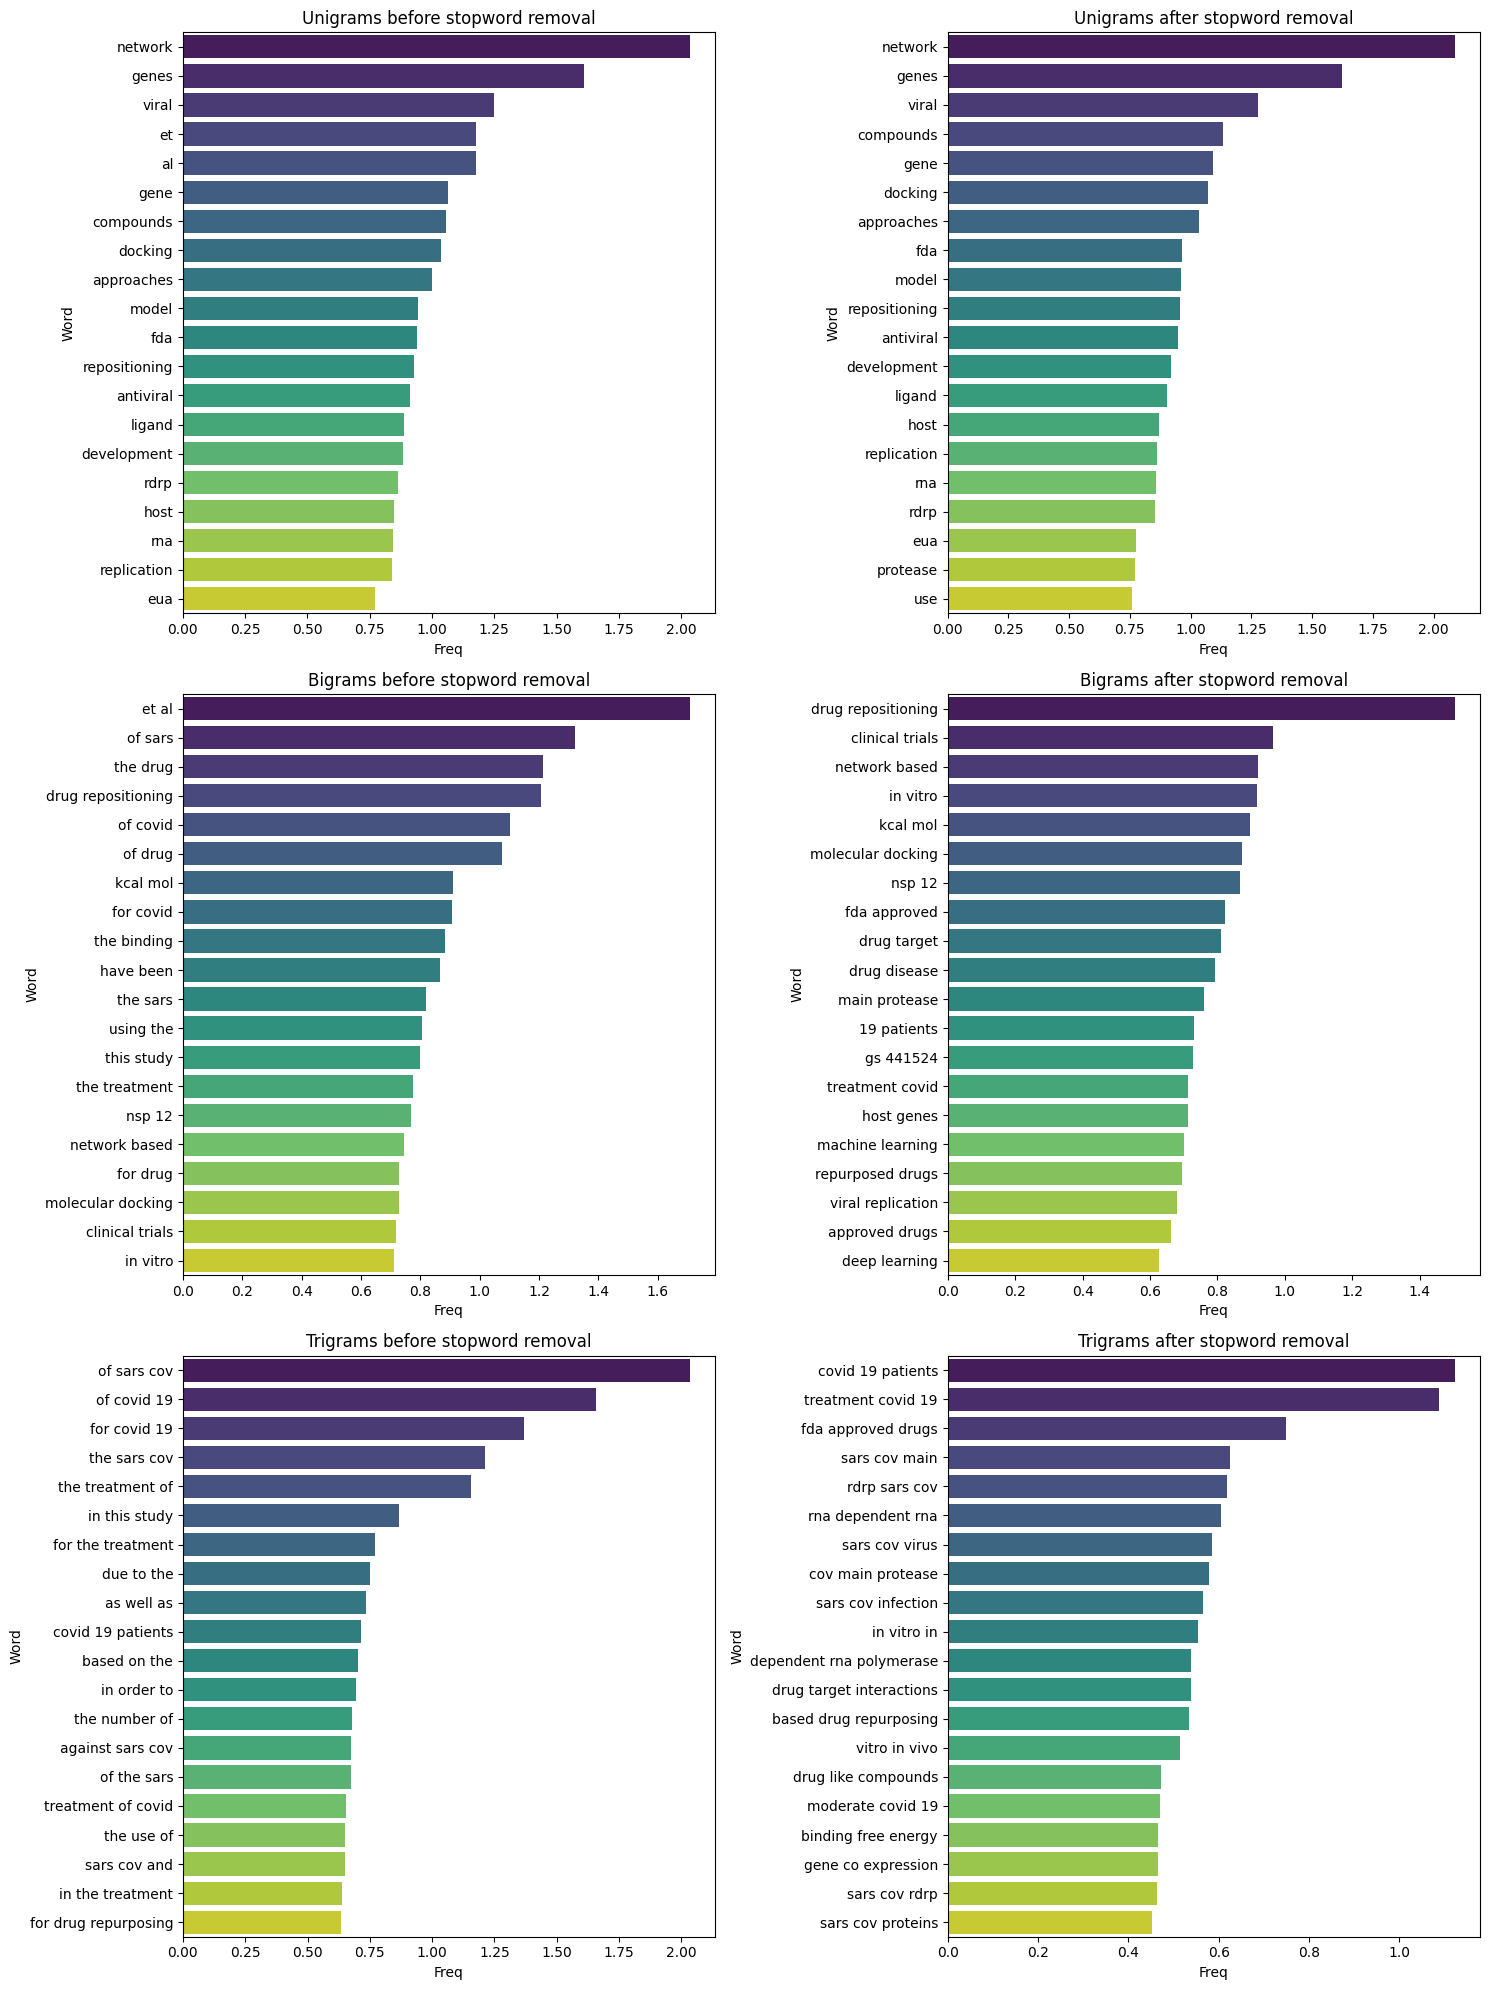

In [ ]:
def plot_multiple_ngrams(n):
    # Create subplots with 3 rows and 2 columns
    fig, axs = plt.subplots(3, 2, figsize=(15, 20))

    # Unigrams
    plot_ngrams('Unigrams before stopword removal', unigrams, ax=axs[0, 0])

    # Unigrams_st
    plot_ngrams('Unigrams after stopword removal', unigrams_st, ax=axs[0, 1])

    # Bigrams
    plot_ngrams('Bigrams before stopword removal', bigrams, ax=axs[1, 0])

    # Bigrams_st
    plot_ngrams('Bigrams after stopword removal', bigrams_st, ax=axs[1, 1])

    # Trigrams
    plot_ngrams('Trigrams before stopword removal', trigrams, ax=axs[2, 0])

    # Trigrams_st
    plot_ngrams('Trigrams after stopword removal', trigrams_st, ax=axs[2, 1])

    # Adjust layout to prevent overlap
    plt.tight_layout()


    plt.savefig('ngram_freq_subplots_titles_tfidf.png')
    plt.show()

plot_multiple_ngrams(n=20)

## 7. Vector similarity

We will create another corpus of three test documents for both the `CountVectorizer()` and `TfidfVectorizer()` models before measuring vector similarity by computing cosine similarity for each.

In [ ]:
text = ["This variant of the coronavirus evolved",
        "It enters the lungs by inhaling contaminated air",
        "There is the dire need for effective treatments."]

In [ ]:
# create a CountVectorizer object to implement the BOW model
cv = CountVectorizer()
# fit the data to CountVectorizer and then convert it into features
X = cv.fit_transform(text)
counts = pd.DataFrame(
    X.toarray(),
    index=text,
    # get_feature_names_out() returns the vocabulary of unique words
    columns=cv.get_feature_names_out())
counts

,air,by,contaminated,coronavirus,dire,effective,enters,evolved,for,inhaling,is,it,lungs,need,of,the,there,this,treatments,variant
This variant of the coronavirus evolved,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1
It enters the lungs by inhaling contaminated air,1,1,1,0,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0
There is the dire need for effective treatments.,0,0,0,0,1,1,0,0,1,0,1,0,0,1,0,1,1,0,1,0


Without removing stopwords there are 20 features with 'the' appearing in all three documents, giving it the highest count using `CountVectorizer()`.

In [ ]:
# create a TfidfVectorizer object to implement the TF-IDF model
tfidf = TfidfVectorizer()
# fit the data to TfidfVectorizer and then convert it into features
X = tfidf.fit_transform(text)
scores = pd.DataFrame(
    X.toarray(),
    index=text,
    # get_feature_names_out() returns the vocabulary of unique words
    columns=tfidf.get_feature_names_out())
scores

,air,by,contaminated,coronavirus,dire,effective,enters,evolved,for,inhaling,is,it,lungs,need,of,the,there,this,treatments,variant
This variant of the coronavirus evolved,0.000000,0.000000,0.000000,0.432385,0.000000,0.000000,0.000000,0.432385,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.432385,0.255374,0.000000,0.432385,0.000000,0.432385
It enters the lungs by inhaling contaminated air,0.368885,0.368885,0.368885,0.000000,0.000000,0.000000,0.368885,0.000000,0.000000,0.368885,0.000000,0.368885,0.368885,0.000000,0.000000,0.217869,0.000000,0.000000,0.000000,0.000000
There is the dire need for effective treatments.,0.000000,0.000000,0.000000,0.000000,0.368885,0.368885,0.000000,0.000000,0.368885,0.000000,0.368885,0.000000,0.000000,0.368885,0.000000,0.217869,0.368885,0.000000,0.368885,0.000000


As expected, using the `TfidfVectorizer()` model, 'the' has a lower vector value than any of the other words which only appeared once.

### 7.1 Cosine similarity

We will compute the cosine similarity, a standard measure of vector similarity in NLP, between documents.

This metric is on a scale of 0 to 1, with 0 meaning the vectors are orthogonal and unrelated to each other, and 1 meaning they are similar and pointing in the same direction.

Cosine similarity ranges from -1 to 1 when dealing with general vectors in a vector space that can have both positive and negative components. In this situation -1 means dissimilar because they point in opposite directions.

However, in the context of typical NLP tasks where vector components are non-negative the range is from 0 to 1.

In [ ]:
# Compute the similarities using the word counts for CountVectorizer() model
similarities = cosine_similarity(X)

pd.DataFrame(similarities,
             index=text,
             columns=text) \
            .style \
            .background_gradient(axis=None)

,This variant of the coronavirus evolved,It enters the lungs by inhaling contaminated air,There is the dire need for effective treatments.
This variant of the coronavirus evolved,1.000000,0.144338,0.144338
It enters the lungs by inhaling contaminated air,0.144338,1.000000,0.125000
There is the dire need for effective treatments.,0.144338,0.125000,1.000000


We will compare this with the output for the `TfidfVectorizer()` model.

In [ ]:
# Compute the similarities for TfidfVectorizer()
similarities = cosine_similarity(X)

pd.DataFrame(similarities,
             index=text,
             columns=text) \
            .style \
            .background_gradient(axis=None)

,This variant of the coronavirus evolved,It enters the lungs by inhaling contaminated air,There is the dire need for effective treatments.
This variant of the coronavirus evolved,1.000000,0.055638,0.055638
It enters the lungs by inhaling contaminated air,0.055638,1.000000,0.047467
There is the dire need for effective treatments.,0.055638,0.047467,1.000000


The cosine similarity for `CountVectorizer()` is computed based on the raw counts of the words so if documents share a lot of common words, the cosine similarity will be higher. It does not take into account the importance of the words (i.e., how common or rare the words are across the whole corpus).

We would need to test this on a larger corpus but we can see that the scores are higher than for `TfidfVectorizer()` which down-weights common words, resulting in a lower similarity score that better reflects the actual content similarity by considering the importance of each word in the context of the entire corpus.



### 7.2 Word embeddings - spaCy

Word Embeddings in NLP is a technique where individual words are represented as real-valued vectors in a lower-dimensional space and captures inter-word semantics. Each word is represented by a real-valued vector with tens or hundreds of dimensions. We will consider this in more detail in a later section on Representation Learning and focus here on comparing cosine similarity between embeddings for the same three test documents.

[spaCy](https://github.com/explosion/spacy-vectors-builder) provides 300-dimensional word embeddings which have been learned from large corpora (Wikipedia, OpenSubtitles, WMT Newscrawl, OSCAR 21.09). Each word is represented by a list of 300 floating point numbers - a vector - and these vectors are embedded into a 300-dimensional space. The default word vectors are [floret](https://github.com/explosion/floret) vectors, floret being an extended version of [fastText](https://github.com/facebookresearch/fastText) - itself an extension of Word2Vec - that can produce word representations for any word from a compact vector table.

To make them compact and fast, spaCy's small pipeline packages do not ship with word vectors, and only include context-sensitive tensors, so we will load a medium language model.





In [ ]:
def get_word_vector(word):
    nlp = spacy.load("en_core_web_md")
    doc = nlp(word)
    print(f"Shape of vector for '{word}': {doc.vector.shape}")
    print(f"Vector for '{word}':\n {doc.vector}")

We will print out the 300 dimensions for the word 'coronavirus'.

In [ ]:
word = "coronavirus"
get_word_vector(word)

Shape of vector for 'coronavirus': (300,)
Vector for 'coronavirus':
 [ 5.2149e+00  2.3675e+00 -9.9240e-01  4.4707e+00  4.1791e+00 -1.7648e-01
 -3.6097e-01  2.3757e+00  3.2227e+00  1.8295e+00  1.5095e+00  9.1945e-01
 -6.6909e+00  1.5942e-01 -4.4473e+00  3.5712e+00  1.2409e+00 -4.9639e-01
 -1.9843e+00  1.7022e+00  1.9722e+00  9.4932e-02  7.6083e-01 -3.9521e-01
 -1.8189e+00 -2.2517e+00  9.3547e-01  3.0324e-01  5.5956e-01 -1.6923e+00
  4.6501e+00  4.3553e-01 -1.5152e+00 -4.1356e+00 -2.1952e+00 -5.6399e+00
 -1.3363e+00  3.1869e+00 -1.0295e+00 -1.4792e+00  1.5969e-02  1.9939e+00
 -7.9299e-01  1.4288e+00 -8.8989e-01 -1.3022e+00  2.8042e+00 -1.9067e+00
 -1.1842e-01  5.4960e+00 -1.6143e+00  1.5116e+00  2.7887e+00 -5.8631e+00
  8.5769e-01  2.1828e+00  6.1815e-01 -9.8484e-01  2.0519e+00  1.5712e+00
 -1.0010e-01  2.4768e-01 -1.5837e+00  3.3506e-01  4.0397e+00  3.8394e+00
 -1.9762e+00  3.1089e+00  7.5438e-01 -1.9697e+00  2.2906e+00  2.8970e+00
 -5.6557e+00  5.4700e-01 -4.0929e+00  2.9122e+00  4.364

In order to find the similarity of each of our three sentences, we'll need to convert them into vectors.

In [ ]:
nlp = spacy.load("en_core_web_md")

vectors = [nlp(sentence).vector for sentence in text]

print("We have", len(vectors), "different vectors")
print("And the first one has", len(vectors[0]), "dimensions")
print("And the second one has", len(vectors[1]), "dimensions")
print("And the third one has", len(vectors[2]), "dimensions")

We have 3 different vectors
And the first one has 300 dimensions
And the second one has 300 dimensions
And the third one has 300 dimensions


From similarity by counting words with `CountVectorizer()` we had 20 dimensions for each sentence: one count for every unique word, so word embeddings bring an extra 280 dimensions.

In [ ]:
# create a CountVectorizer object to implement the BOW model
cv = CountVectorizer()
# fit the data to CountVectorizer and then convert it into features
X = cv.fit_transform(text)
counts = pd.DataFrame(
    X.toarray(),
    index=text,
    # get_feature_names_out() returns the vocabulary of unique words
    columns=cv.get_feature_names_out())
counts

,air,by,contaminated,coronavirus,dire,effective,enters,evolved,for,inhaling,is,it,lungs,need,of,the,there,this,treatments,variant
This variant of the coronavirus evolved,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1
It enters the lungs by inhaling contaminated air,1,1,1,0,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0
There is the dire need for effective treatments.,0,0,0,0,1,1,0,0,1,0,1,0,0,1,0,1,1,0,1,0


Using spaCy's word embeddings we can measure semantic similarity between documents instead of just word comparisons. By using the cosine similarity again we can calculate the similarity between embeddings.

In [ ]:
similarities = cosine_similarity(vectors)

pd.DataFrame(similarities,
             index=text,
             columns=text) \
            .style \
            .background_gradient(axis=None)

,This variant of the coronavirus evolved,It enters the lungs by inhaling contaminated air,There is the dire need for effective treatments.
This variant of the coronavirus evolved,1.000000,0.620483,0.717299
It enters the lungs by inhaling contaminated air,0.620483,1.000000,0.587739
There is the dire need for effective treatments.,0.717299,0.587739,1.000000


None of these sentences are totally dissimilar whereas previously we had multiple zeros. Word embeddings allow semantic understanding rather than just word counting which looks for exact matches.

### References

* https://medium.com/@nishi.paul.in/text-analytics-a-nlp-magic-126d1db78186

* https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a

* https://www.analyticsvidhya.com/blog/2022/01/nlp-tutorials-part-ii-feature-extraction/

* https://github.com/littlecolumns/ds4j-notebooks/blob/81bbb4a262bf287169a88cd1e6b72dd9c2439eae/text-analysis/notebooks

* https://applied-language-technology.mooc.fi/html/notebooks/part_iii/05_embeddings_continued.html

* https://www.analyticsvidhya.com/blog/2021/06/part-5-step-by-step-guide-to-master-nlp-text-vectorization-approaches/